In [1]:
import scipy, numpy as np, matplotlib.pyplot as plt, glob, pickle, sys, os, pandas as pd
import subprocess, pickle as pkl


In [15]:
def write_sbatch(npy_in, prefix, batch_size, lag_time, n_sm_list, reps):
    
    filename = "opt" + '_b-'+ str(batch_size) + '_lt-'+ str(lag_time) + ".sbatch"
    file = open(filename,"w+")
    
    file.write('''#!/bin/bash

#SBATCH --mail-type=ALL
#SBATCH --mail-user=mikejones@uchicago.edu

#SBATCH --job-name=1-cpt

#SBATCH --output=out-1-cpt.out
#SBATCH --partition=broadwl
#SBATCH --nodes=1 # SET NUM NODES 
#SBATCH --ntasks-per-node=1 # SETS NUM MPI RANKS
#SBATCH --cpus-per-task=1 # SET NUM THREADS (cores)
#SBATCH --mem=30GB # REQUEST MEMORY
##SBATCH --constraint=gold-6248
##SBATCH --qos=gm4-cpu


# ex. python run_SNV_to_pkl.py mdtraj-pwdr-AT-all-326T-395-1000-190.npy prefix

    ''')
    
    file.close()
    
    # open for appending python command
    file = open(filename,"a+") 
    
    py_line = 'python run_SNV_to_pkl.py ' + npy_in + ' ' + prefix
    #py_line = npy_in
    
    # writes a new line for each slow mode
    for n_sm in n_sm_list:
        for rep in range(reps):
        
            append_line = "\n" + py_line + " " + str(batch_size) + " " + str(lag_time) + " " + str(n_sm) + " " + str(rep) 
            file.write(append_line)

    file.close()
    return filename
    

In [17]:
def run_sbatch_T_conf_dict(npy_in, prefix, batch_size_list, lag_time_list, n_sm_list, reps):
    
    batch_list = []
    sims = 0
    
    for batch_size in batch_size_list:
        for lag_time in lag_time_list:

            batch_name = write_sbatch(npy_in, prefix, batch_size, lag_time, n_sm_list, reps)
            subprocess.call(['sbatch', batch_name]) 
        

In [18]:
## runs everything
'''
npy_in = "mdtraj-pwdr-AT-all-326T-50-50001-190.npy"
prefix = '50_full_traj-30e-'

batch_size_list = [50, 500, 5000, 50000, 500000]
lag_time_list = [1, 4, 16, 64, 256]
n_sm_list = [3, 4, 5, 6, 7, 8]
reps = 5

run_sbatch_T_conf_dict(npy_in, prefix, batch_size_list, lag_time_list, n_sm_list, reps)

'''

In [21]:
## analyze pkl output and make data frame

pkl_path = 'hyper_test_out_30e/'
prefix = 'b50k-200traj-30e-'

batch_size_list = [500, 5000, 50000, 500000]
lag_time_list = [1, 4, 16, 64, 256]
n_sm_list = [3, 4, 5, 6, 7, 8]
reps = 5
data_len = 4

# declare empy tensor to contain all data
data = np.zeros([len(batch_size_list), len(lag_time_list), len(n_sm_list), reps, data_len])

# iterate through all files in pkl_path
for filename in os.listdir(pkl_path):
    if filename.endswith(".pkl"):
        
        # replace - with /n and split lines
        name = filename.replace(prefix, '').replace('.pkl', '').replace('-','\n')
    
        line_arr = [int(i) for i in name.splitlines()]
    
        # match index of line_array to index of data tensor
        index = [batch_size_list.index(line_arr[0]), lag_time_list.index(line_arr[1]), n_sm_list.index(line_arr[2]), line_arr[3]]
        
        # get pickled data
        with open(pkl_path + filename, 'rb') as f:
            pkl_vec = pkl.load(f)
            
            print(index)
            print
            data[index[0], index[1], index[2], index[3]] = pkl_vec

        
#b50k-100traj-100e-500-1-3-0.pkl

[3, 3, 4, 1]
[3, 0, 1, 0]
[1, 0, 2, 1]
[2, 3, 0, 2]
[0, 0, 2, 0]
[2, 4, 4, 4]
[3, 2, 1, 4]
[2, 0, 3, 0]
[1, 4, 2, 0]
[3, 3, 1, 3]
[3, 4, 0, 2]
[3, 1, 4, 2]
[1, 1, 4, 1]
[3, 1, 3, 1]
[2, 4, 0, 0]
[1, 2, 1, 2]
[2, 2, 4, 4]
[0, 4, 0, 0]
[2, 2, 3, 1]
[3, 3, 4, 4]
[2, 0, 0, 1]
[3, 2, 4, 3]
[0, 0, 2, 1]
[2, 0, 2, 4]
[3, 1, 4, 1]
[0, 0, 5, 2]
[1, 3, 4, 0]
[3, 1, 5, 4]
[3, 3, 1, 4]
[3, 1, 2, 2]
[1, 0, 0, 3]
[1, 0, 1, 4]
[1, 1, 0, 0]
[2, 1, 4, 4]
[0, 3, 5, 2]
[1, 1, 0, 2]
[1, 4, 0, 0]
[1, 1, 3, 3]
[2, 2, 4, 3]
[3, 2, 3, 2]
[3, 1, 3, 4]
[1, 0, 3, 0]
[0, 3, 2, 3]
[1, 1, 1, 1]
[1, 4, 5, 1]
[3, 2, 0, 4]
[0, 4, 0, 1]
[2, 2, 3, 4]
[1, 0, 3, 2]
[3, 2, 3, 4]
[1, 3, 5, 3]
[2, 2, 2, 3]
[3, 3, 3, 4]
[2, 1, 5, 4]
[3, 0, 1, 2]
[1, 3, 5, 4]
[3, 2, 4, 1]
[0, 2, 1, 1]
[3, 4, 0, 0]
[1, 2, 3, 4]
[3, 3, 5, 3]
[3, 2, 2, 3]
[2, 1, 4, 1]
[1, 4, 3, 1]
[1, 3, 0, 4]
[0, 2, 4, 3]
[1, 1, 3, 1]
[2, 0, 1, 1]
[0, 1, 4, 2]
[3, 0, 0, 1]
[3, 2, 4, 4]
[0, 4, 0, 4]
[2, 4, 2, 0]
[3, 4, 0, 1]
[1, 1, 4, 4]
[0, 4, 1, 2]
[1, 0, 1, 3]

In [22]:
## reshape data such that rep and pkl dimensions are combined into mean and variance of each category
## Ex. 5 reps x (3 slow modes + 1 score) ---> (4 means + 4 variances) all in same data index line
## reshaping goes like 5 x 5 x 6 x 5 x 4 ---> 5 x 5 x 6 x 8

avg_data = np.zeros([len(data), len(data[0]), len(data[0, 0]), data_len*2])

## iterate through each of first indices in data
for i in range(len(data)):
    for j in range(len(data[0])):
        for k in range(len(data[0, 0])):
            
            # get 2 dimemension data from index i, j, k
            rep_arr = data[i, j, k]
            line_len = len(rep_arr[0])
            
            # iterate through each rep
            for l in range(line_len):
                
                # calculate mean value of each line item across reps
                avg_data[i, j, k, l] = np.mean(rep_arr[:, l])
                
                # calcuatle varaince value and add to l + 4 index
                avg_data[i, j, k, l + line_len] = np.var(rep_arr[:, l])
                      
                

[3.98970909 3.98472943 3.97387176 3.94047632 3.79919882 3.99716644
 3.99463234 3.98764982 3.96264157 3.84553223 3.99859409 3.99664307
 3.99085321 3.9695045  3.85899916 3.99683356 3.99311595 3.98420391
 3.95632825 3.83595366]
[1.95238667 3.75400572 3.68483467 3.82702289 4.57400475 4.99239292
 4.98616757 4.96978726 4.91884332 4.70889688 4.99628277 4.99252777
 4.98347116 4.94070864 4.75914516 4.99353123 4.98775687 4.97186146
 4.92118139 4.71662774]
[5.86694937 5.83190575 5.72729712 5.41602936 2.50702538 5.97615414
 5.95534267 5.92084217 5.82293177 5.47920046 5.98760643 5.98482523
 5.96360273 5.88561649 5.6049222  5.98327332 5.95424986 5.93044367
 5.85487185 5.4813755 ]
[6.80386467 6.74115925 6.54303255 5.92972918 3.7602489  6.96030569
 6.9117135  6.82132616 6.51997709 5.76773167 6.98221931 6.95785074
 6.89528618 6.67527514 5.99446754 6.96892414 6.93344183 6.83407297
 6.58280334 5.88094769]
[7.68939762 7.59423599 7.31483641 6.47821178 4.7342474  7.94795494
 7.87162161 7.70653992 7.26146536

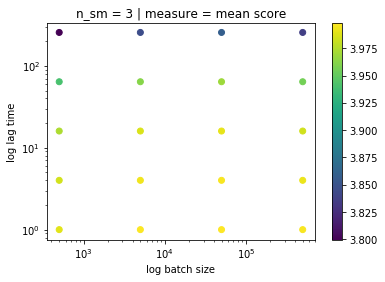

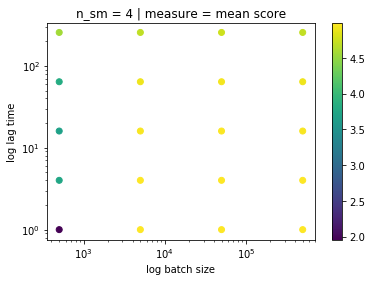

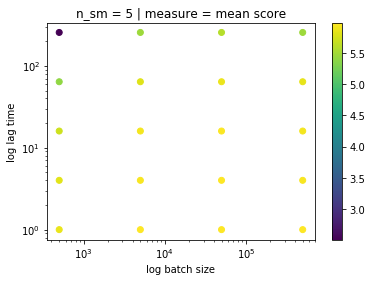

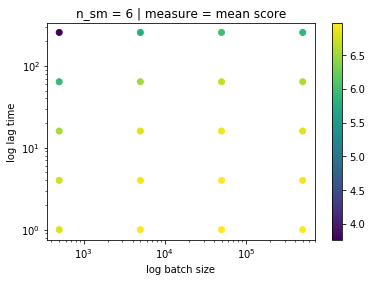

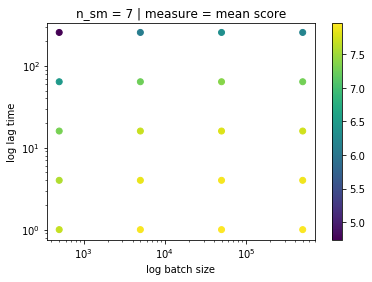

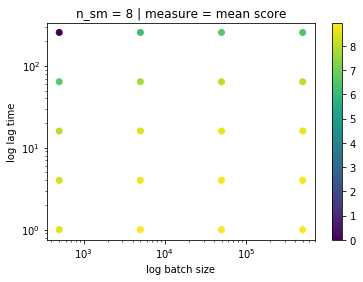

In [24]:
## find lowest score variance in avg_data tensor

measure_dict = {'mean 1':0, 'mean 2':1, 'mean 3':2, 'mean score':3,
                'var 1':4, 'var 2':5, 'var 3':6, 'var score':7}
            
## plot for fixed n_sm = 5 and measure = 7 variance of score

def plot_hypers(x_var, y_var, fixed_sm, measure, avg_data):

    ## create 2 dim data array with fixes n_sm and measure
    fixed_n_sm_arr = avg_data[:,:,n_sm_list.index(fixed_sm), measure_dict[measure]]

    # make scatter x and y axes for each combination of values
    x = np.repeat(x_var, len(lag_time_list))
    y = np.tile(y_var, len(batch_size_list))

    # get indicies for x and y
    x_i = [x_var.index(i) for i in x]
    y_j = [y_var.index(j) for j in y]

    # get color by interating through fixed array
    c = np.zeros(len(x))
    cnt = 0 

    for i in range(len(x_var)):
        for j in range(len(y_var)):

            c[cnt] = (fixed_n_sm_arr[i, j])
            cnt += 1
    print(c)
            
    fig = plt.figure()
    ax = plt.gca()
    sc = ax.scatter(x, y, c=c)

    ax.set_title('n_sm = ' + str(fixed_sm) + ' | measure = ' + measure)
    ax.set_yscale('log')
    ax.set_ylabel('log lag time')
    ax.set_xscale('log')
    ax.set_xlabel('log batch size')
    plt.colorbar(sc)

    
measure = 'mean score'
fixed_sm = 3
x_var = batch_size_list 
y_var = lag_time_list

for fixed_sm in n_sm_list:
    plot_hypers(x_var, y_var, fixed_sm, measure, avg_data)

In [19]:
a = np.zeros((3, 5, 6))
list_a = [i for i in a]

print(np.shape(list_a))

print(np.shape(np.concatenate(list_a)))

(3, 5, 6)
(15, 6)
